In [3]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [4]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import datetime
import numpy as np

In [5]:
Patents = pd.read_csv('../Data/Patent data - PatentsView/patent.csv',sep=',')
Patents.date = pd.to_datetime(Patents.date, format='%Y-%m-%d',errors='coerce')
print('len before cleaning',len(Patents))

# Henda öllum patents með ekkert abstract 
Patents = Patents[[type(x) == type('str') for x in Patents.abstract]]

print('len after removing patents without abstracts', len(Patents))

C:\Users\Sverrir\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (1,3,6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


len before cleaning 7104987
len after removing patents without abstracts 6489437


### Vista allt sem inniheldur orðið "Blockchain" í abstractinu í subsett

In [6]:
'blockchain' in 'Blockchains are'

False

In [7]:
df_bc = Patents[[(('blockchain' in x) or ('Blockchain' in x )) for x in Patents.abstract]]

In [13]:
# df_bc

C:\Users\Sverrir\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


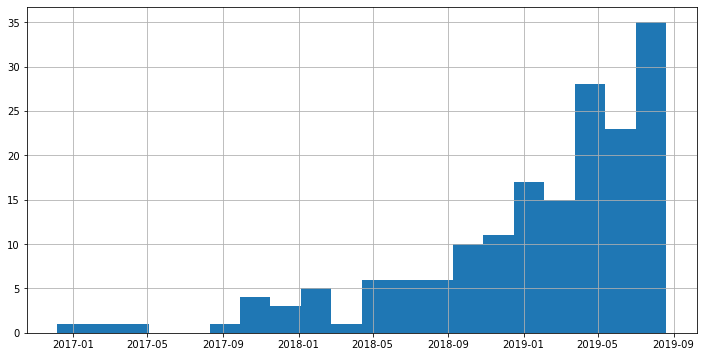

In [9]:

plt.figure(figsize=(12,6))
df_bc.date.hist(bins=(20))

In [10]:

df_crypto = Patents[[(('cryptocurrency' in x) or ('Cryptocurrency' in x )) for x in Patents.abstract]]


In [ ]:
df_bc.date
plt.figure(figsize=(12,6))
df_crypto.date.hist()


In [ ]:
df_virtual_reality = Patents[[(('virtual reality' in x) or ('Virtual reality' in x )) for x in Patents.abstract]]
print(len(df_virtual_reality))
plt.figure(figsize=(12,6))
df_virtual_reality.date.hist(bins=(20))
plt.title('Virtual reality patents')

In [ ]:
df_virtual_reality = Patents[[(('virtual reality' in x) or ('Virtual reality' in x )) for x in Patents.abstract]]
print(len(df_virtual_reality))
plt.figure(figsize=(12,6))
df_virtual_reality.date.hist(bins=(20))

In [11]:
out = ' '.join(df_bc.abstract)

In [15]:
# out

How many most common words to print: 40

OK. The 40 most common words are as follows

blockchain :  425
data :  252
block :  143
transaction :  131
network :  120
device :  105
user :  103
based :  94
information :  90
method :  81
second :  81
digital :  79
key :  75
ledger :  70
using :  68
blocks :  68
includes :  65
smart :  65
hash :  64
transactions :  62
new :  61
associated :  58
distributed :  56
include :  54
contract :  50
record :  50
receiving :  49
private :  49
access :  47
plurality :  47
including :  46
content :  45
computer :  44
token :  44
message :  43
node :  41
entity :  40
value :  39
blockchains :  39
set :  38


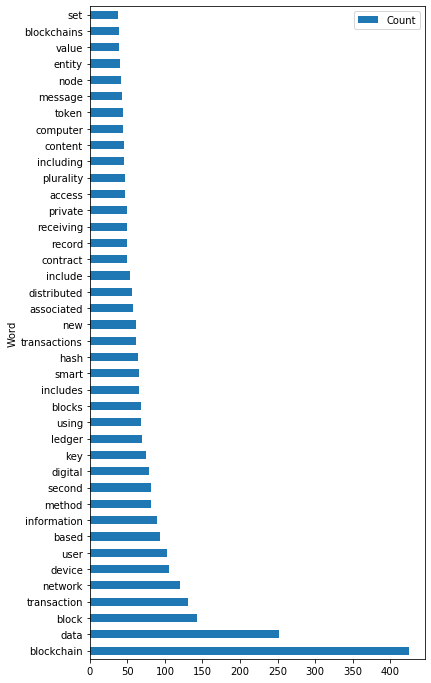

In [22]:
import collections
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
%matplotlib inline
# Read input file, note the encoding is specified here 
# It may be different in your text file
# file = open('PrideandPrejudice.txt', encoding="utf8")
a= out
# Stopwords
# stopwords = set(line.strip() for line in open('stopwords.txt'))
stopwords = ENGLISH_STOP_WORDS
# Instantiate a dictionary, and for every word in the file, 
# Add to the dictionary if it doesn't exist. If it does, increase the count.
wordcount = {}
# To eliminate duplicates, remember to split by punctuation, and use case demiliters.
for word in a.lower().split():
    word = word.replace(".","")
    word = word.replace(",","")
    word = word.replace(":","")
    word = word.replace("\"","")
    word = word.replace("!","")
    word = word.replace("â€œ","")
    word = word.replace("â€˜","")
    word = word.replace("*","")
    if word not in stopwords:
        if word not in wordcount:
            wordcount[word] = 1
        else:
            wordcount[word] += 1
# Print most common word
n_print = int(input("How many most common words to print: "))
print("\nOK. The {} most common words are as follows\n".format(n_print))
word_counter = collections.Counter(wordcount)
for word, count in word_counter.most_common(n_print):
    print(word, ": ", count)
# Close the file
# file.close()
# Create a data frame of the most common words 
# Draw a bar chart
lst = word_counter.most_common(n_print)
df = pd.DataFrame(lst, columns = ['Word', 'Count'])
df.plot.barh(x='Word',y='Count',figsize=(6,12))